# Sentiment Analysis using TF-IDF on SVM, Naive Bayes, KNN, LDA and NN

In [1]:
# IMPORT PACKAGES

import pandas as pd
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from keras import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import models
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras
np.set_printoptions(threshold=np.inf)

Using TensorFlow backend.


## Load Data Set

In [2]:
np_raw = np.load('jira_raw.npz')
data = {'text': np_raw["raw_docs"], 'label': np_raw["labels"]}
df = pd.DataFrame(data)

df.groupby('label').size()

label
0    2458
1      27
2     342
3     622
4       7
5    2236
dtype: int64

## Pre-processing

In [3]:
def cleanText(text):
    result = text.lower()
    result = re.sub('<.*?>', ' ', str(result))
    result = re.sub('[^A-Za-z]+', ' ', result)
    return result
    
df["text"] = df["text"].apply(lambda x: cleanText(x))
df["text"] = df["text"].apply(lambda x: nltk.word_tokenize(x))

def remove_stopwords(text):
    new_token = []
    for t in text:
        if t not in stop_words:
            new_token.append(t)
    return new_token

def join(text):
    string = ", ".join(text)
    string = string.replace(",", "")
    return string


df["text"] = df["text"].apply(lambda x: remove_stopwords(x))
df["text"] = df["text"].apply(lambda x: join(x))
df

,text,label
0,yeah patch great categories bug,0
1,upgrade recent version jackrabbit see http wik...,3
2,sorry,3
3,looks good,0
4,brock commented two test failed org apache had...,5
5,count protected lock also extract removeat inv...,5
6,thanks amar,0
7,hi holly thanks one comment code internalrecur...,0
8,commit patch trunk thanks sameera,5
9,committed revision,5


### TF-IDF

In [4]:
X = df['text']
Y = df['label']

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['text'])
X_Tfidf = Tfidf_vect.transform(X)

In [5]:
print(Tfidf_vect.vocabulary_)

{'yeah': 4968, 'patch': 3145, 'great': 1816, 'categories': 585, 'bug': 513, 'upgrade': 4690, 'recent': 3514, 'version': 4768, 'jackrabbit': 2268, 'see': 3884, 'http': 1990, 'wiki': 4868, 'apache': 208, 'org': 3061, 'afraid': 92, 'say': 3835, 'much': 2849, 'sorry': 4100, 'looks': 2585, 'good': 1800, 'brock': 498, 'commented': 758, 'two': 4605, 'test': 4392, 'failed': 1482, 'hadoop': 1850, 'hive': 1942, 'cli': 689, 'testnegativeminimrclidriver': 4416, 'testnegativeclidriver': 4415, 'mapreduce': 2659, 'stack': 4161, 'trace': 4538, 'hcatalog': 1895, 'fileformats': 1540, 'testorcdynamicpartitioned': 4417, 'testhcatdynamicpartitionedtable': 4408, 'assert': 282, 'reproduce': 3653, 'count': 930, 'protected': 3377, 'lock': 2560, 'also': 146, 'extract': 1461, 'removeat': 3607, 'invoking': 2224, 'check': 624, 'make': 2629, 'sure': 4309, 'zero': 4985, 'chance': 606, 'could': 929, 'invalidate': 2216, 'extrac': 1460, 'thanks': 4434, 'amar': 154, 'hi': 1930, 'holly': 1954, 'one': 3025, 'comment': 757

In [6]:
print(X_Tfidf)

  (0, 4968)	0.5476721420681181
  (0, 3145)	0.18363331910394823
  (0, 1816)	0.3720243078144083
  (0, 585)	0.6388204846946592
  (0, 513)	0.3461796233851406
  (1, 4868)	0.27511005879978073
  (1, 4768)	0.1982012056691273
  (1, 4690)	0.29921551342863206
  (1, 3884)	0.17184138548511613
  (1, 3835)	0.2414651480584202
  (1, 3514)	0.31972816278754806
  (1, 3061)	0.18841787519693173
  (1, 2849)	0.20461499224746035
  (1, 2268)	0.592168920262576
  (1, 1990)	0.21653928153616459
  (1, 208)	0.1850179275316532
  (1, 92)	0.31030037341727407
  (2, 4100)	1.0
  (3, 2585)	0.7193830826535055
  (3, 1800)	0.6946135475154077
  (4, 4605)	0.1576191985829164
  (4, 4538)	0.1998259244820999
  (4, 4417)	0.24430876021305067
  (4, 4416)	0.24430876021305067
  (4, 4415)	0.24430876021305067
  :	:
  (5689, 3005)	0.17280012632063438
  (5689, 2851)	0.35519502000888414
  (5689, 2835)	0.13096482548288457
  (5689, 2582)	0.09392690832894252
  (5689, 2421)	0.10194262713529136
  (5689, 2420)	0.17759751000444207
  (5689, 2187)	0.1

## Training and Testing

In [7]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X_Tfidf,Y,test_size=0.2)
print("   X         Y")
print(Train_X.shape, Train_Y.shape) # 4553 training samples
print(Test_X.shape, Test_Y.shape) # 1139 test samples
print(type(Train_X), type(Train_Y))

   X         Y
(4553, 5000) (4553,)
(1139, 5000) (1139,)
<class 'scipy.sparse.csr.csr_matrix'> <class 'pandas.core.series.Series'>


In [8]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X, Train_Y)
predictions_NB = Naive.predict(Test_X)
print(accuracy_score(predictions_NB, Test_Y)*100)
print(classification_report(Test_Y, predictions_NB))

76.29499561018437
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       490
           1       0.00      0.00      0.00         8
           2       1.00      0.21      0.35        71
           3       0.87      0.31      0.46       133
           5       0.69      0.86      0.77       437

    accuracy                           0.76      1139
   macro avg       0.68      0.45      0.49      1139
weighted avg       0.78      0.76      0.74      1139



C:\Users\Bryan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X, Train_Y)
predictions_SVM = SVM.predict(Test_X)
print(accuracy_score(predictions_SVM, Test_Y)*100)
print(classification_report(Test_Y, predictions_SVM))

84.37225636523266
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       490
           1       0.00      0.00      0.00         8
           2       0.90      0.73      0.81        71
           3       0.85      0.62      0.72       133
           5       0.79      0.88      0.83       437

    accuracy                           0.84      1139
   macro avg       0.68      0.63      0.65      1139
weighted avg       0.84      0.84      0.84      1139



In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(Train_X.toarray(), Train_Y)
predictions_LDA = LDA.predict(Test_X)
print(accuracy_score(predictions_LDA, Test_Y)*100)
print(classification_report(Test_Y, predictions_LDA))

C:\Users\Bryan\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


80.59701492537313
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       490
           1       0.00      0.00      0.00         8
           2       0.81      0.70      0.75        71
           3       0.70      0.61      0.65       133
           5       0.79      0.88      0.83       437

    accuracy                           0.81      1139
   macro avg       0.63      0.60      0.61      1139
weighted avg       0.80      0.81      0.80      1139



In [11]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(Train_X, Train_Y)
predictions_KNN = KNN.predict(Test_X)
print(accuracy_score(predictions_KNN, Test_Y)*100)
print(classification_report(Test_Y, predictions_KNN))

56.8920105355575
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       490
           1       0.00      0.00      0.00         8
           2       1.00      0.35      0.52        71
           3       0.27      0.80      0.40       133
           5       0.87      0.15      0.25       437

    accuracy                           0.57      1139
   macro avg       0.57      0.45      0.40      1139
weighted avg       0.73      0.57      0.52      1139



C:\Users\Bryan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
Y_ohe = keras.utils.to_categorical(Y, 6)

In [13]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X_Tfidf,Y_ohe,test_size=0.2)

In [14]:
model = Sequential()
model.add(Dense(2500, input_shape=(5000,)))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

W0809 00:58:28.643334 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 00:58:28.695200 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 00:58:28.711161 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 00:58:28.769080 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0809 00:58:28.781049 11424 deprecation.py:506

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)

W0809 00:58:28.848787 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 00:58:28.895660 11424 deprecation_wrapper.py:119] From C:\Users\Bryan\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



['loss', 'acc']


In [16]:
history = model.fit(Train_X, Train_Y, batch_size=100, epochs=5, verbose=1, validation_split=0.2)
score = model.evaluate(Test_X, Test_Y, batch_size=100, verbose=1)

print('\nTest loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

W0809 00:58:29.164968 11424 deprecation.py:323] From C:\Users\Bryan\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3642 samples, validate on 911 samples
Epoch 1/5
3642/3642 [==============================] - 16s 4ms/step - loss: 0.9567 - acc: 0.6604 - val_loss: 0.5450 - val_acc: 0.8200
Epoch 2/5
3642/3642 [==============================] - 15s 4ms/step - loss: 0.3699 - acc: 0.8811 - val_loss: 0.5071 - val_acc: 0.8496
Epoch 3/5
3642/3642 [==============================] - 14s 4ms/step - loss: 0.2146 - acc: 0.9195 - val_loss: 0.5140 - val_acc: 0.8474
Epoch 4/5
3642/3642 [==============================] - 15s 4ms/step - loss: 0.1743 - acc: 0.9272 - val_loss: 0.5872 - val_acc: 0.8452
Epoch 5/5
1139/1139 [==============================] - 1s 577us/step

Test loss: 56.782248739195666
Test accuracy: 83.40649650325055


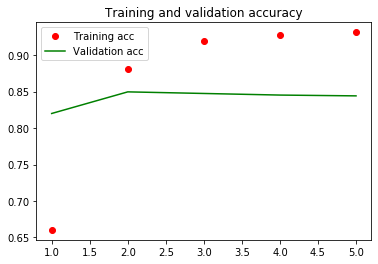

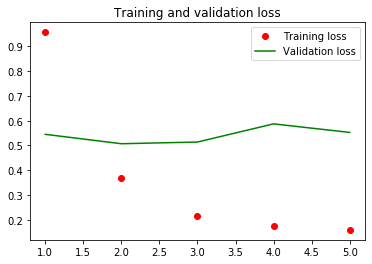

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

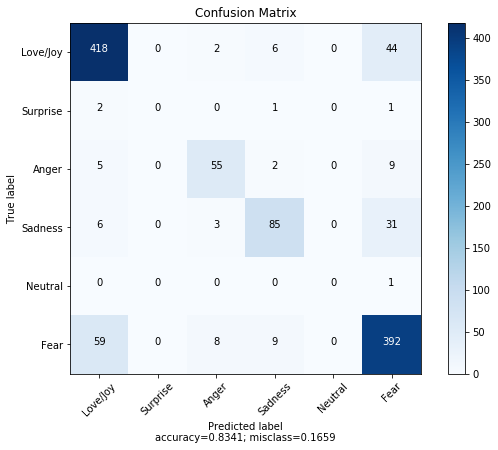

In [18]:
y_orig = np.argmax(Test_Y, axis=1)
probs = model.predict(Test_X)
preds = np.argmax(probs, axis=1)
cm = confusion_matrix(y_orig, preds)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Love/Joy', 'Surprise', 'Anger', 'Sadness', 'Neutral', 'Fear'],
                      title        = "Confusion Matrix")